## Data Exploration and Cleaning of project

### Project Work flow

* Problem Statement
* Data Collection
* EDA
* Preprocessing 
* Emotion Detection 
* Music Recommendation Logic
* Model evaluation

#### 1) Problem Statement

* This is an emotion-aware music recommendation system that classifies and recommends songs not only based on their musical and lyrical features, but also by incorporating the emotional context behind them. 

* The main goal of this project is to enhance the effectiveness of music recommendations by categorizing songs into four core emotions — such as `happy`, `sad`, `angry`, and `relaxed` — and leveraging similarities in audio features within these emotion groups.

* By integrating emotional weighting into the recommendation logic, it is aims to provide more personalized and mood-relevant suggestions to users, helping them discover songs that resonate with their current feelings or desired emotional state.

#### 2) Data Collection

* This dataset has been downloaded from `500k+ Spotify Songs with Lyrics, Emotions & More`
* Dataset Link - https://www.kaggle.com/datasets/devdope/900k-spotify

In [143]:
### Importing required packages
import numpy as np
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [144]:
file_id = "1Hg3ENUzwsb3rLSFqEW9zcHPB98VVApXi"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "raw_data.csv", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1Hg3ENUzwsb3rLSFqEW9zcHPB98VVApXi
From (redirected): https://drive.google.com/uc?id=1Hg3ENUzwsb3rLSFqEW9zcHPB98VVApXi&confirm=t&uuid=ceee0440-048d-47de-b885-f6b31e5d8719
To: c:\Users\Admin\music_recommendation_system_based_on_emotion\notebook\raw_data.csv
100%|██████████| 1.15G/1.15G [02:06<00:00, 9.08MB/s]


'raw_data.csv'

In [145]:
data = pd.read_csv('raw_data.csv')

In [146]:
data.head()

,Artist(s),song,text,Length,emotion,Genre,Album,Release Date,Key,Tempo,...,Good for Morning Routine,Similar Artist 1,Similar Song 1,Similarity Score 1,Similar Artist 2,Similar Song 2,Similarity Score 2,Similar Artist 3,Similar Song 3,Similarity Score 3
0,!!!,Even When the Waters Cold,Friends told her she was better off at the bot...,03:47,sadness,hip hop,Thr!!!er,29th April 2013,D min,105,...,0,Corey Smith,If I Could Do It Again,0.986061,Toby Keith,Drinks After Work,0.983719,Space,Neighbourhood,0.983236
1,!!!,One Girl / One Boy,"Well I heard it, playing soft From a drunken b...",04:03,sadness,hip hop,Thr!!!er,29th April 2013,A# min,117,...,0,Hiroyuki Sawano,BRE@TH//LESS,0.995409,When In Rome,Heaven Knows,0.990905,Justice Crew,Everybody,0.984483
2,!!!,Pardon My Freedom,"Oh my god, did I just say that out loud? Shoul...",05:51,joy,hip hop,Louden Up Now,8th June 2004,A Maj,121,...,0,Ricky Dillard,More Abundantly Medley Live,0.993176,Juliet,Avalon,0.965147,The Jacksons,Lovely One,0.956752
3,!!!,Ooo,[Verse 1] Remember when I called you on the te...,03:44,joy,hip hop,As If,16th October 2015,A min,122,...,0,Eric Clapton,Man Overboard,0.992749,Roxette,Don't Believe In Accidents,0.991494,Tiwa Savage,My Darlin,0.990381
4,!!!,Freedom 15,[Verse 1] Calling me like I got something to s...,06:00,joy,hip hop,As If,16th October 2015,F min,123,...,0,Cibo Matto,Lint Of Love,0.981610,Barrington Levy,Better Than Gold,0.981524,Freestyle,Its Automatic,0.981415


### 3) Exploratory Data Analysis

In [147]:
data.columns

Index(['Artist(s)', 'song', 'text', 'Length', 'emotion', 'Genre', 'Album',
       'Release Date', 'Key', 'Tempo', 'Loudness (db)', 'Time signature',
       'Explicit', 'Popularity', 'Energy', 'Danceability', 'Positiveness',
       'Speechiness', 'Liveness', 'Acousticness', 'Instrumentalness',
       'Good for Party', 'Good for Work/Study',
       'Good for Relaxation/Meditation', 'Good for Exercise',
       'Good for Running', 'Good for Yoga/Stretching', 'Good for Driving',
       'Good for Social Gatherings', 'Good for Morning Routine',
       'Similar Artist 1', 'Similar Song 1', 'Similarity Score 1',
       'Similar Artist 2', 'Similar Song 2', 'Similarity Score 2',
       'Similar Artist 3', 'Similar Song 3', 'Similarity Score 3'],
      dtype='object')

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551443 entries, 0 to 551442
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Artist(s)                       551443 non-null  object 
 1   song                            551427 non-null  object 
 2   text                            551443 non-null  object 
 3   Length                          551443 non-null  object 
 4   emotion                         551443 non-null  object 
 5   Genre                           551443 non-null  object 
 6   Album                           551391 non-null  object 
 7   Release Date                    551443 non-null  object 
 8   Key                             551443 non-null  object 
 9   Tempo                           551443 non-null  int64  
 10  Loudness (db)                   551443 non-null  object 
 11  Time signature                  551435 non-null  object 
 12  Explicit        

In [149]:
data.shape

(551443, 39)

#### Insights

* This dataset contain nearly 5,50,000 rows with 39 columns. 
* It has totally 18 categorical columns, 18 integer columns and 3 float columns.

### Checking for null values

In [150]:
data.isnull().sum()

Artist(s)                          0
song                              16
text                               0
Length                             0
emotion                            0
Genre                              0
Album                             52
Release Date                       0
Key                                0
Tempo                              0
Loudness (db)                      0
Time signature                     8
Explicit                           0
Popularity                         0
Energy                             0
Danceability                       0
Positiveness                       0
Speechiness                        0
Liveness                           0
Acousticness                       0
Instrumentalness                   0
Good for Party                     0
Good for Work/Study                0
Good for Relaxation/Meditation     0
Good for Exercise                  0
Good for Running                   0
Good for Yoga/Stretching           0
G

#### Insights

* The dataset contains some missing values. Since it's quite large, I chose to remove the rows with null values instead of filling them with placeholder values, to maintain data quality.

In [151]:
data.dropna(inplace=True)

In [152]:
data.shape

(551324, 39)

### Checking for duplicated values

In [153]:
data.duplicated().sum()

np.int64(53382)

In [154]:
data = data.drop_duplicates().reset_index(drop = True)

In [155]:
data.shape

(497942, 39)

In [156]:
data.drop(['Length', 'Album', 'Release Date', 'Key', 'Time signature', 'Explicit', 'Popularity'], axis = 1, inplace=True)

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497942 entries, 0 to 497941
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Artist(s)                       497942 non-null  object 
 1   song                            497942 non-null  object 
 2   text                            497942 non-null  object 
 3   emotion                         497942 non-null  object 
 4   Genre                           497942 non-null  object 
 5   Tempo                           497942 non-null  int64  
 6   Loudness (db)                   497942 non-null  object 
 7   Energy                          497942 non-null  int64  
 8   Danceability                    497942 non-null  int64  
 9   Positiveness                    497942 non-null  int64  
 10  Speechiness                     497942 non-null  int64  
 11  Liveness                        497942 non-null  int64  
 12  Acousticness    

<Axes: xlabel='emotion'>

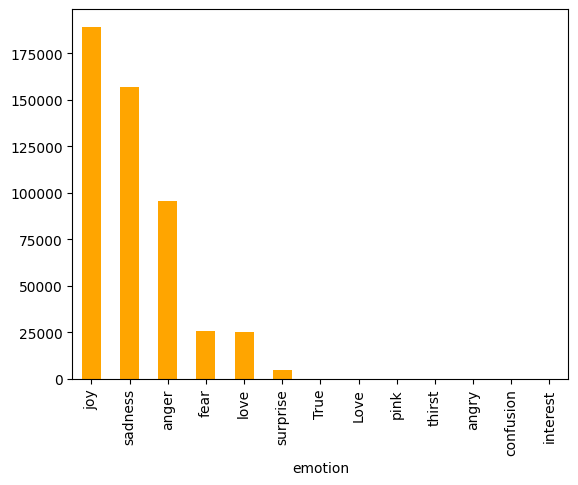

In [158]:
data['emotion'].value_counts().plot(kind='bar', color='orange')

In [159]:
data['emotion'].value_counts()['True']

np.int64(17)

In [160]:
data['emotion'].value_counts()['Love']

np.int64(2)

In [161]:
data['emotion'].value_counts()['angry']

np.int64(1)

In [162]:
data['emotion'].unique()

array(['sadness', 'joy', 'love', 'surprise', 'anger', 'fear', 'angry',
       'True', 'thirst', 'confusion', 'pink', 'interest', 'Love'],
      dtype=object)

#### Insights 

* Labels like `True`, `thirst`, `interest`, `confusion`, `angry`, `Love` and `pink` are very less compared to other. So i just want to remove them for better data quality.

In [163]:
data = data[~data['emotion'].isin(['True', 'thirst', 'pink', 'interest', 'angry','Love','confusion'])]

In [164]:
data.shape

(497917, 32)

In [165]:
artist_count = data['Artist(s)'].value_counts()
artist_count

Artist(s)
L.A.B.                                     1428
TEMM DOGG                                   701
Kora                                        670
Shapeshifter                                641
Home Brew                                   606
                                           ... 
落日飛車 Sunset Rollercoaster,Michael Seyer       1
藤田淳平                                          1
血の女王（CV. 田中理恵）                                1
遠藤正明                                          1
코케                                            1
Name: count, Length: 127306, dtype: int64

In [ ]:
popular_artist = artist_count[artist_count >= 30].index
data = data[data['Artist(s)'].isin(popular_artist)].reset_index(drop=True)

In [167]:
data.shape

(245193, 32)

In [168]:
data['Artist(s)'].value_counts()

Artist(s)
L.A.B.           1428
TEMM DOGG         701
Kora              670
Shapeshifter      641
Home Brew         606
                 ... 
YN Jay             25
Ziggy Alberts      25
YoungstaCPT        25
Yung Nugget        25
Yung Gravy         25
Name: count, Length: 3721, dtype: int64

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245193 entries, 0 to 245192
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Artist(s)                       245193 non-null  object 
 1   song                            245193 non-null  object 
 2   text                            245193 non-null  object 
 3   emotion                         245193 non-null  object 
 4   Genre                           245193 non-null  object 
 5   Tempo                           245193 non-null  int64  
 6   Loudness (db)                   245193 non-null  object 
 7   Energy                          245193 non-null  int64  
 8   Danceability                    245193 non-null  int64  
 9   Positiveness                    245193 non-null  int64  
 10  Speechiness                     245193 non-null  int64  
 11  Liveness                        245193 non-null  int64  
 12  Acousticness    

#### Insights

***Filtering Artists by Frequency***

* To reduce noise and focus on more relevant data, we remove artists that appear fewer than 50 times in the dataset. 

* Before filtering: 127,308 unique artists

* After filtering: 1578 unique artists
* This step ensures that the model trains on artists with enough representation, leading to more reliable recommendations.

<Axes: xlabel='emotion'>

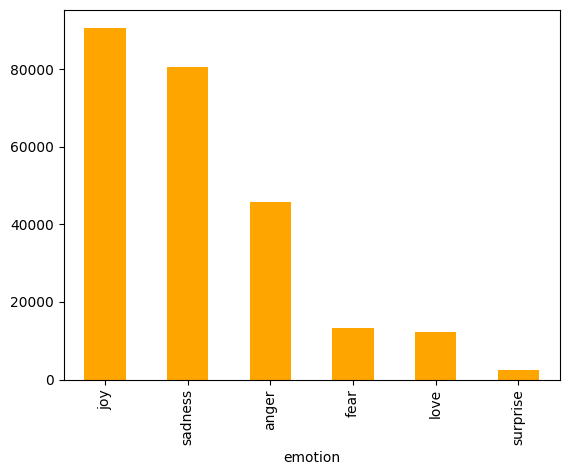

In [170]:
data['emotion'].value_counts().plot(kind='bar', color='orange')

In [171]:
data.Genre.value_counts()

Genre
hip hop                                             39674
pop                                                  5632
country                                              4588
rock,pop,alternative rock                            3234
rap,hip hop                                          3037
                                                    ...  
shoegaze,indie rock,indie                              25
pop,synthpop,electronic                                25
rap,jazz,hip hop                                       25
progressive metal,psychedelic rock,post-hardcore       25
alternative rock,hard rock,psychedelic rock            25
Name: count, Length: 1209, dtype: int64

In [172]:
data.columns

Index(['Artist(s)', 'song', 'text', 'emotion', 'Genre', 'Tempo',
       'Loudness (db)', 'Energy', 'Danceability', 'Positiveness',
       'Speechiness', 'Liveness', 'Acousticness', 'Instrumentalness',
       'Good for Party', 'Good for Work/Study',
       'Good for Relaxation/Meditation', 'Good for Exercise',
       'Good for Running', 'Good for Yoga/Stretching', 'Good for Driving',
       'Good for Social Gatherings', 'Good for Morning Routine',
       'Similar Artist 1', 'Similar Song 1', 'Similarity Score 1',
       'Similar Artist 2', 'Similar Song 2', 'Similarity Score 2',
       'Similar Artist 3', 'Similar Song 3', 'Similarity Score 3'],
      dtype='object')

#### Audio Feature Distributions

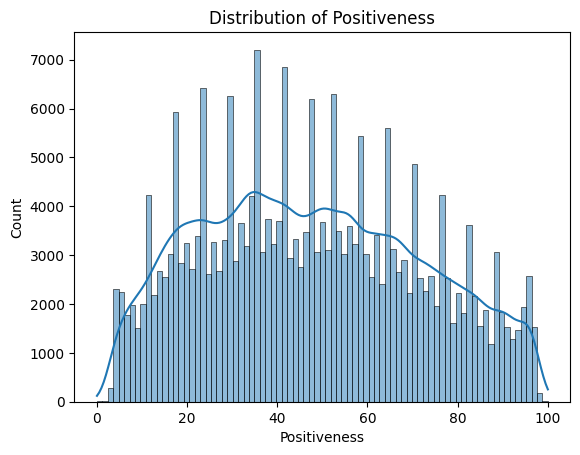

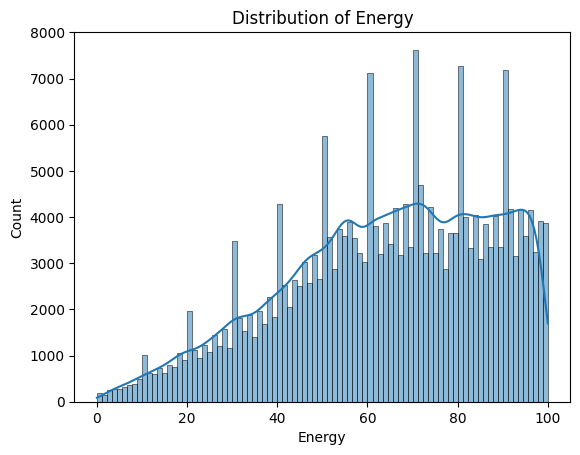

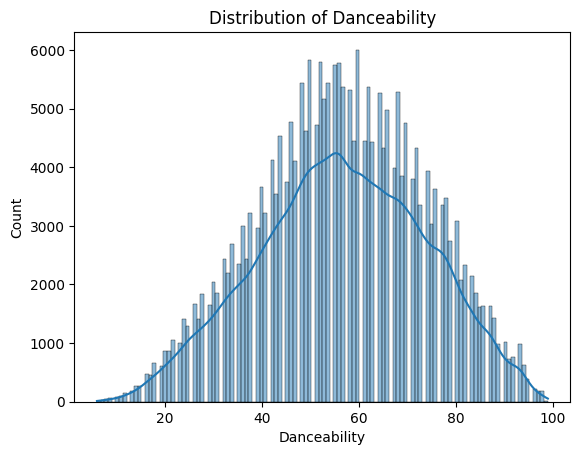

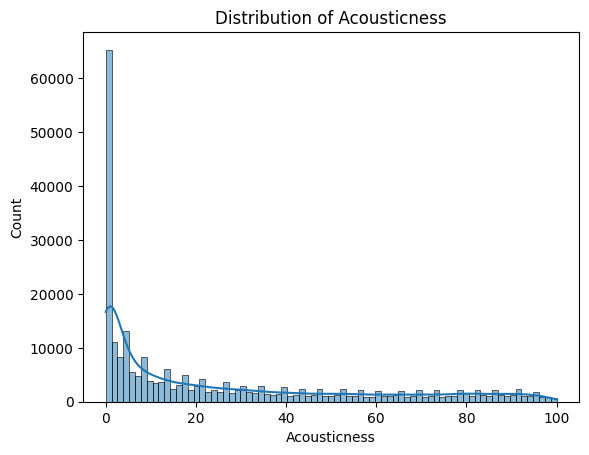

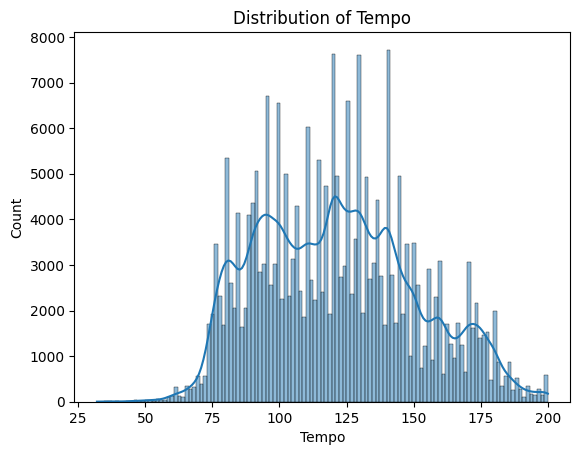

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

audio_features = ['Positiveness', 'Energy', 'Danceability', 'Acousticness', 'Tempo']
for feature in audio_features:
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

#### Insights

* `Energy`: Most songs have moderate to high energy (40-100 range), showing a strong presence of upbeat tracks and biased toward energetic songs. Useful for identifying emotions like joy, anger and motivation.
* `Acousticness`: Sharp peak near 0, meaning most songs are highly electronic and Helpful in classifying calm emotions like love, sadness, or relaxation.
* `Positiveness`: Distributed fairly evenly but slightly skewed toward mid range(30-70). Indicates a mix of both happy and sad songs.
* `Danceability`: Normally distributed peaking around 50-60 very few songs are undanceable and few songs are extremely danceable.
* `Tempo`: Most songs lie between 80-150 with a peak near 120. have some outliers at very low or very high tempos. it can influence mood recognitio like faster means energetic, slower means emotional.

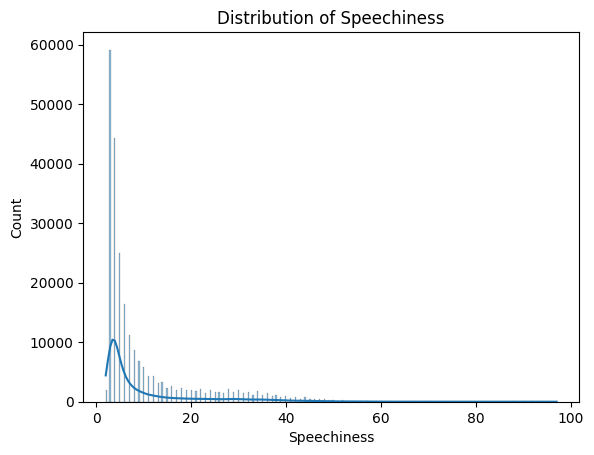

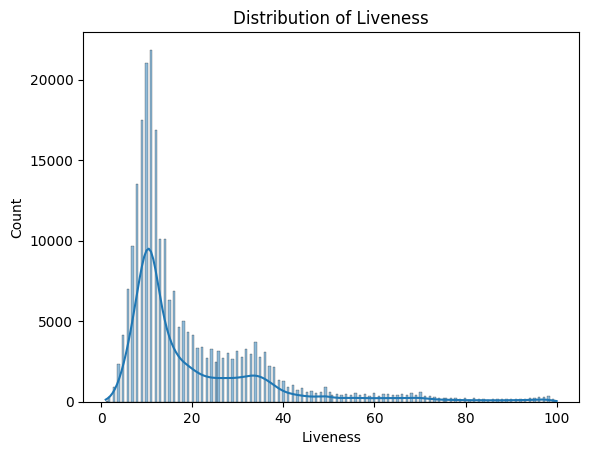

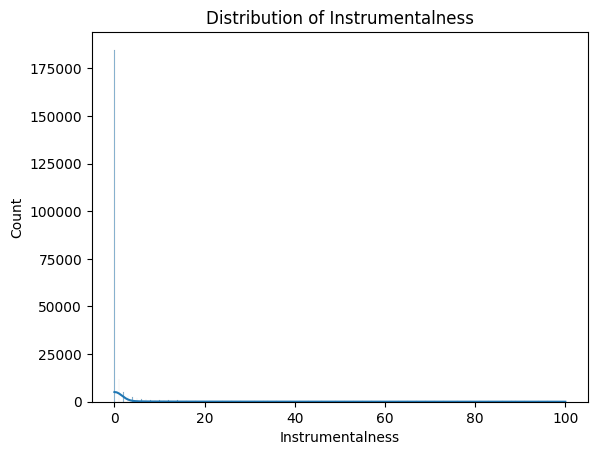

In [174]:
audio_features = ['Speechiness', 'Liveness', 'Instrumentalness']
for feature in audio_features:
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

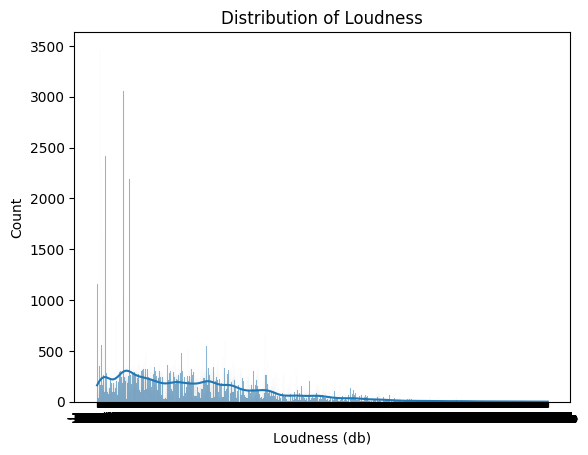

In [175]:
sns.histplot(data['Loudness (db)'], kde=True)
plt.title('Distribution of Loudness')
plt.show()

In [176]:
data.columns

Index(['Artist(s)', 'song', 'text', 'emotion', 'Genre', 'Tempo',
       'Loudness (db)', 'Energy', 'Danceability', 'Positiveness',
       'Speechiness', 'Liveness', 'Acousticness', 'Instrumentalness',
       'Good for Party', 'Good for Work/Study',
       'Good for Relaxation/Meditation', 'Good for Exercise',
       'Good for Running', 'Good for Yoga/Stretching', 'Good for Driving',
       'Good for Social Gatherings', 'Good for Morning Routine',
       'Similar Artist 1', 'Similar Song 1', 'Similarity Score 1',
       'Similar Artist 2', 'Similar Song 2', 'Similarity Score 2',
       'Similar Artist 3', 'Similar Song 3', 'Similarity Score 3'],
      dtype='object')

#### Insights

* `Speechiness` is heavily right skewed, peaking at very low values, meaning most songs have little to no speech.
* `Liveness` is somewhat normally distributed with a peak around 10-15 low stage presence detection.
* `Instrumentalness` is almost zero for most tracks, highly right skewed. Most songs aren't instrumental.

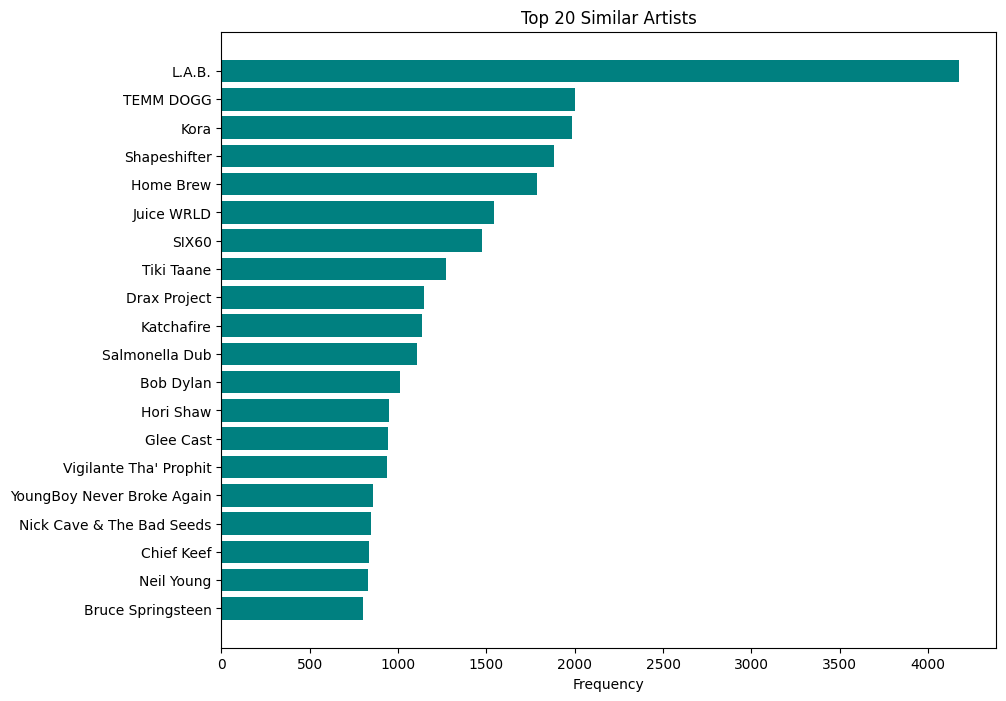

In [177]:
from collections import Counter


all_similar_artists = (
    data['Similar Artist 1'].tolist() + data['Similar Artist 2'].tolist() + data['Similar Artist 3'].tolist()
    )

artist_counts = Counter(all_similar_artists)
top_artists = dict(artist_counts.most_common(20))  

# Plot
plt.figure(figsize=(10, 8))
plt.barh(list(top_artists.keys()), list(top_artists.values()), color='teal')
plt.xlabel("Frequency")
plt.title("Top 20 Similar Artists")
plt.gca().invert_yaxis()
plt.show()

#### Relation Between Emotion and Audio

<Axes: xlabel='emotion', ylabel='Positiveness'>

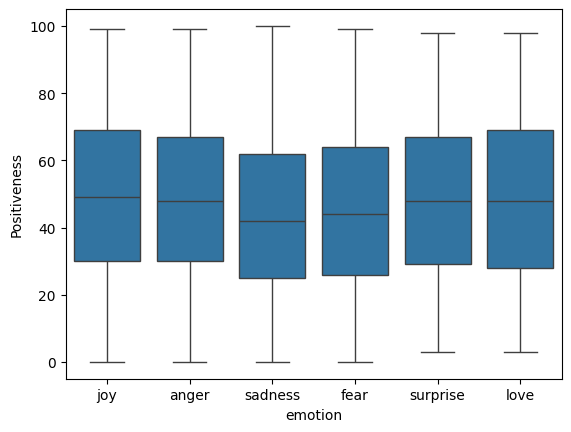

In [178]:
#### Relation between emotion and valence
sns.boxplot(x='emotion', y='Positiveness', data=data)

<Axes: xlabel='emotion', ylabel='Energy'>

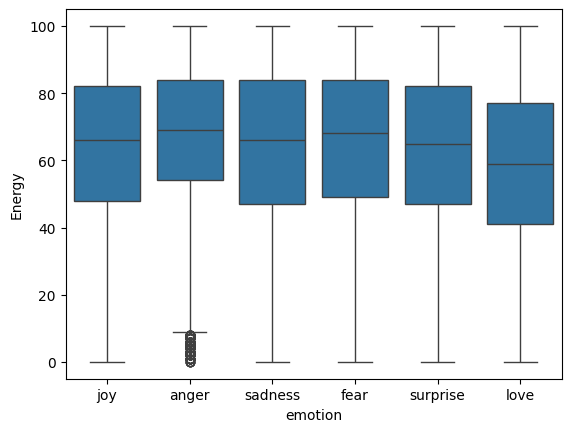

In [179]:
#### Relation between emotion and energy
sns.boxplot(x='emotion', y='Energy', data=data)

<Axes: xlabel='emotion', ylabel='Danceability'>

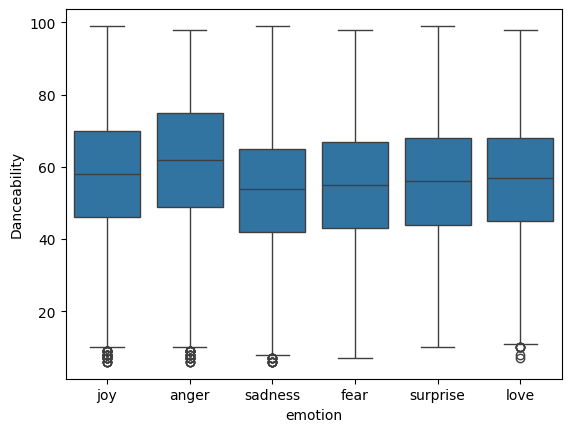

In [180]:
#### Relation between emotion and danceability
sns.boxplot(x='emotion', y='Danceability', data=data)

<Axes: xlabel='emotion', ylabel='Tempo'>

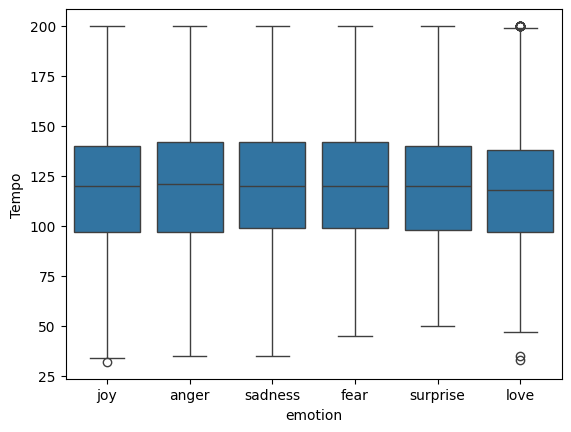

In [181]:
#### Relation between emotion and tempo
sns.boxplot(x='emotion', y='Tempo', data=data)

<Axes: xlabel='emotion', ylabel='Acousticness'>

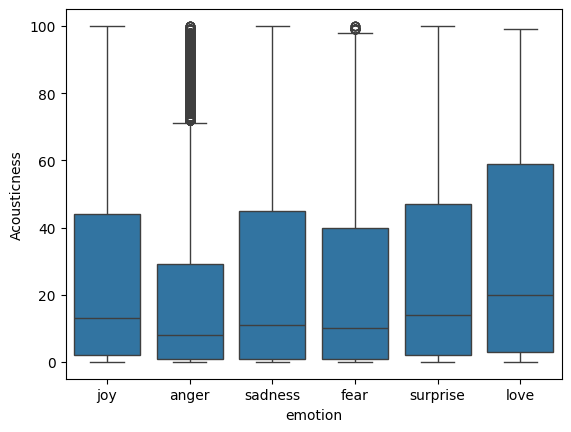

In [182]:
#### Relation between emotion and acousticness
sns.boxplot(x='emotion', y='Acousticness', data=data)

#### Insights 

* `Positiveness VS Emotion`: All emotions have a similar spread in positiveness (0-100), joy and love show a slightly higher median positiveness. sadness and fear have slightly lower medians.
* `Energy VS Emotion`: Anger, Fear and Sadness show high energy levels and Anger has many outliers on the lower end, indicating some angry tracks that are low in energy. Love and Joy have slightly lower medians but still high.
* `Danceability VS Emotion`: All emotions show similar medians and distributions. Anger has a higher median and slightly narrower IQR implying consistent danceability in angry tracks. Sadness shows more variability with some lower outliers.
* `Tempo VS Emotion`: Tempo distribution is very similar across all emotions and medians around 120-130.
* `Acousticness VS Emotion`: Love, Sadness and Joy have higher acousticness, Anger and Fear show low median acousticness with lots of low outliers, Anger and Fear also have many outliers.

#### Correlation Heatmap

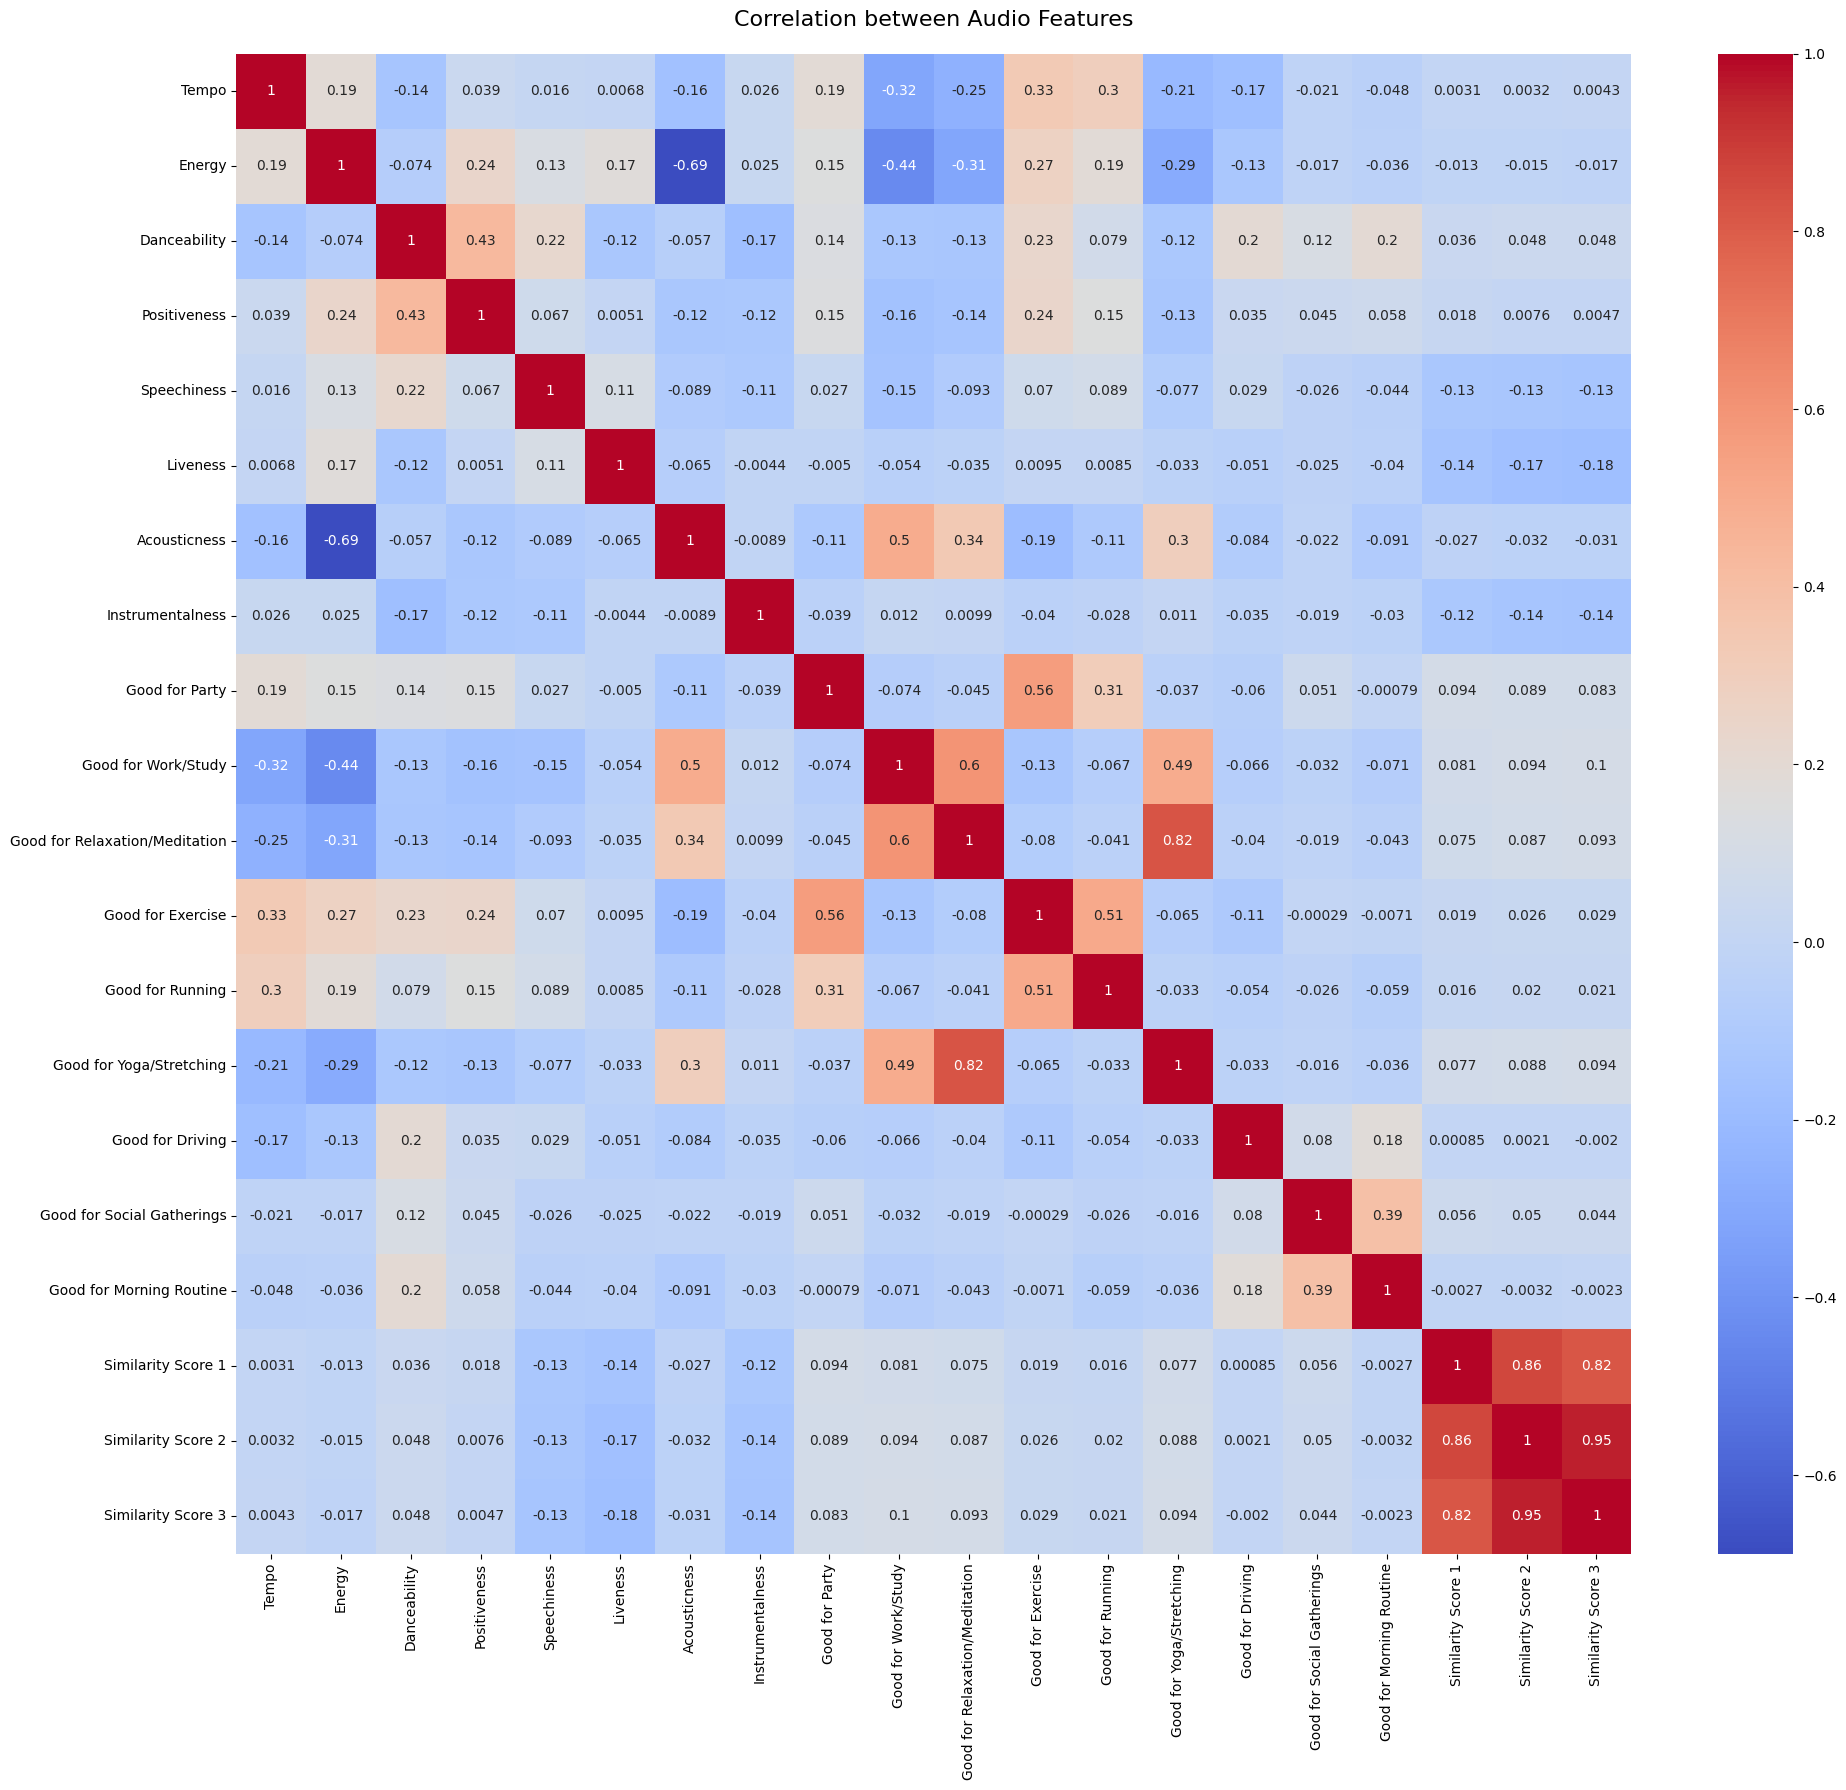

In [183]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')

plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=10)   # Rotate y-axis labels
plt.title("Correlation between Audio Features", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

#### Insights

**`Strong Positive Correlations`** 
* Energy and Danceability (0.62) Enegetic songs tend to be more danceable.
* Positiveness and Danceability (0.41) Happier songs are also more danceable.
* Good for party correlates highly with Energy(0.58), Danceability(0.50), Positiveness(0.52).
* Good for Exercise Highly correlation with Energy(0.62) and also with Danceability(0.49).

**`Strong Negative correlations`**
* Acousticness has negative correlations with Energy(-0.61), Danceability(-0.18), Good for Excercise(-0.38), Good for Party(-0.41), Good for Running(-0.35).
* Acoustic songs tend to be calm, less energetic, and not suitable for workouts or parties.
* Good for Relaxation/Meditation is Negative correlation with energy(-0.48) and Tempo(-0.25) but Positively correlative with Acousticness(0.43) Because Meditation tracks are slow, calm and acoustic-heavy.

#### UX Tags Analysis

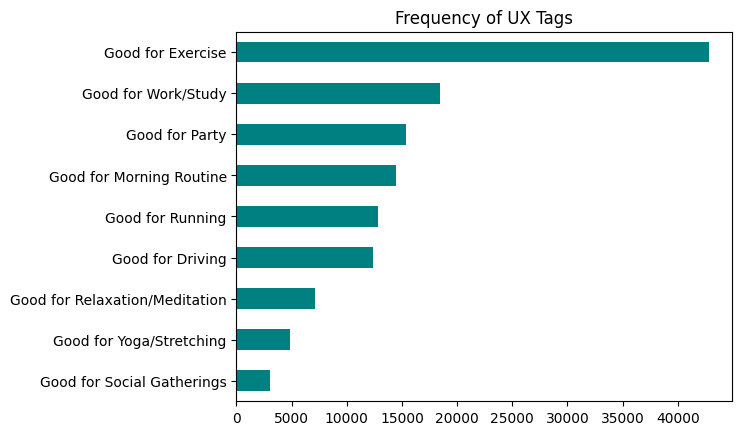

In [184]:
ux_cols = [col for col in data.columns if 'Good for' in col]
data[ux_cols].sum().sort_values().plot(kind='barh', color='teal')
plt.title("Frequency of UX Tags")
plt.show()

#### Insights

* `Good for Exercise`: Most frequent tag by a large margin — over 30,000 tracks. This shows a strong bias in the dataset towards high-energy, motivational music.
* `Good for Party & Good for Work/Study` has similar volume of data with nearly 12,000 tracks.
* `Good for Morning Routine & Good for Running` have moderate usage nearly 10k and 9k respectively.
* `Good for Driving` Around 8k which is less frequent.

* `Good for Relaxation/Meditation & Good for Yoga/Stretching` are around 5k and 4k nearly. They are typically calm, slow tempo and possibly acoustic tracks.
* So i need to merge these columns for into a new tag like `Relaxation/Yoga` for improving model generalization for calm/emotional music.
* Also want to remove `Good for Social Gatherings` which may introduce noise or imbalance to model.

In [185]:
data['Good for Relaxation/Yoga'] = ((data['Good for Relaxation/Meditation'] == 1) | (data['Good for Yoga/Stretching'] == 1)).astype(int)
data.drop(['Good for Relaxation/Meditation', 'Good for Yoga/Stretching'], axis = 1, inplace=True)

In [186]:
data.drop('Good for Social Gatherings', axis = 1, inplace=True)

### 4) Preprocessing and Cleaning data

In [187]:
### Converting objective type into numerical type
data['Loudness (db)'] = data['Loudness (db)'].str.replace('db','')
data['Loudness (db)'] = pd.to_numeric(data['Loudness (db)'], errors='coerce')

In [188]:
data['Loudness (db)'].dtype

dtype('float64')

In [189]:
suspicious = data[data['Artist(s)'].str.len() < 2]
print(suspicious[['Artist(s)']])

       Artist(s)
239347         X
239348         X
239349         X
239350         X
239351         X
239352         X
239353         X
239354         X
239355         X
239356         X
239357         X
239358         X
239359         X
239360         X
239361         X
239362         X
239363         X
239364         X
239365         X
239366         X
239367         X
239368         X
239369         X
239370         X
239371         X
239372         X
239373         X
239374         X
239375         X
239376         X
239377         X
239378         X
239379         X
239380         X
239381         X
239382         X
239383         X
239384         X
239385         X
239386         X
239387         X
239388         X
239389         X
239390         X
239391         X


In [190]:
# Remove only unwanted symbols and extra spaces — keep useful names like 'u2', 'd major'
import re
def clean_artist(artist):
    artist = str(artist).strip().lower()
    artist = re.sub(r'[^\w\s]', '', artist)  
    artist = re.sub(r'\s+', ' ', artist)     
    return artist.strip()

data['Artist(s)'] = data['Artist(s)'].apply(clean_artist)

In [191]:
# Now remove entries with artist names too short
data = data[data['Artist(s)'].str.len() > 1]

In [192]:
print("Remaining short artist names:", data['Artist(s)'][data['Artist(s)'].str.len() < 2].unique())

Remaining short artist names: []


In [193]:
short_artists = data['Artist(s)'][data['Artist(s)'].str.lower().str.len() < 2].unique()
print("Short artist names:", short_artists)

Short artist names: []


In [194]:
data['Artist(s)']

0                 weird al yankovic
1                 weird al yankovic
2                 weird al yankovic
3                 weird al yankovic
4                 weird al yankovic
                    ...            
245188    落日飛車 sunset rollercoaster
245189    落日飛車 sunset rollercoaster
245190    落日飛車 sunset rollercoaster
245191    落日飛車 sunset rollercoaster
245192    落日飛車 sunset rollercoaster
Name: Artist(s), Length: 245148, dtype: object

In [195]:
data.text.value_counts()

text
Love is a many splendored thing    It's the April rose that only grows in the early Spring    Love is nature's way of giving a reason to be living    The golden crown that makes a man a king    Once on a high and windy hill, In the morning mist    Two lovers kissed and the world stood still    Then your fingers touched my silent heart and taught it how to sing    Yes, true love's a many splendored thing        Love is a many splendored thing    It's the April rose that only grows in the early Spring    Love is nature's way of giving a reason to be living    The golden crown that makes a man a king    Once on a high and windy hill, In the morning mist    Two lovers kissed and the world stood still    Then your fingers touched my silent heart and taught it how to sing    Yes, true love's a many splendored thing                                                                                                                                                                               

#### Remove Artist(s) with invalid name 

In [ ]:
# Fully numeric artist names
fully_numeric = data['Artist(s)'][data['Artist(s)'].str.fullmatch(r'\d+')]
print("🎤 Fully numeric artist names:", fully_numeric.unique().tolist())

In [ ]:
import re
def clean_artist_name(name):
    if pd.isna(name):
        return ""
    if name.strip().isdigit():
        return name.strip()
    
    name = name.lower().strip()
    replacements = {
        '$': 's',
        '4': 'a',
        '0': 'o',
        '@': 'a',
        '1': 'l',
        '!': 'i'
    }

    # Replace each special character with its mapped value
    for char, replacement in replacements.items():
        name = name.replace(char, replacement)

    # Remove any remaining special characters except space
    name = re.sub(r'[^a-z0-9\s]', '', name)
    name = re.sub(r'\s+', ' ', name).strip()

    return name

In [212]:
data['Artist(s)'] = data['Artist(s)'].astype(str).apply(clean_artist_name)

In [198]:
import re
import unicodedata

def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = unicodedata.normalize('NFKD', text)        
    text = re.sub(r'[^\w\s]', '', text)               
    text = re.sub(r'\s+', ' ', text)                  
    return text.strip()

In [199]:
data['song_clean'] = data['song'].astype(str).apply(clean_text)
data['text_clean'] = data['text'].astype(str).apply(clean_text)

In [200]:
data = data.drop_duplicates(subset=['song_clean', 'text_clean']).reset_index(drop=True)

In [201]:
data['Artist(s)'].value_counts()

Artist(s)
lab              1427
temm dogg         701
kora              670
shapeshifter      640
home brew         606
                 ... 
noah cyrus         25
yung gravy         25
eteeth             25
ziggy alberts      25
dragon             24
Name: count, Length: 3719, dtype: int64

In [202]:
data.drop(columns=['song_clean', 'text_clean'], inplace=True)

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244689 entries, 0 to 244688
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Artist(s)                 244689 non-null  object 
 1   song                      244689 non-null  object 
 2   text                      244689 non-null  object 
 3   emotion                   244689 non-null  object 
 4   Genre                     244689 non-null  object 
 5   Tempo                     244689 non-null  int64  
 6   Loudness (db)             244689 non-null  float64
 7   Energy                    244689 non-null  int64  
 8   Danceability              244689 non-null  int64  
 9   Positiveness              244689 non-null  int64  
 10  Speechiness               244689 non-null  int64  
 11  Liveness                  244689 non-null  int64  
 12  Acousticness              244689 non-null  int64  
 13  Instrumentalness          244689 non-null  i

In [204]:
#### Cleaning Genre Column
data.Genre

0         rock,pop,comedy
1         rock,pop,comedy
2         rock,pop,comedy
3         rock,pop,comedy
4         rock,pop,comedy
               ...       
244684            hip hop
244685            hip hop
244686            hip hop
244687            hip hop
244688            hip hop
Name: Genre, Length: 244689, dtype: object

In [205]:
#### Cleaning Genre Column
data['Genre'] = data['Genre'].str.lower().str.replace(' ', '').str.replace('-', '')
data['Genre'] = data['Genre'].str.split(',')

# Join list into a space-separated string
data['Genre_str'] = data['Genre'].apply(lambda x: ' '.join(x))

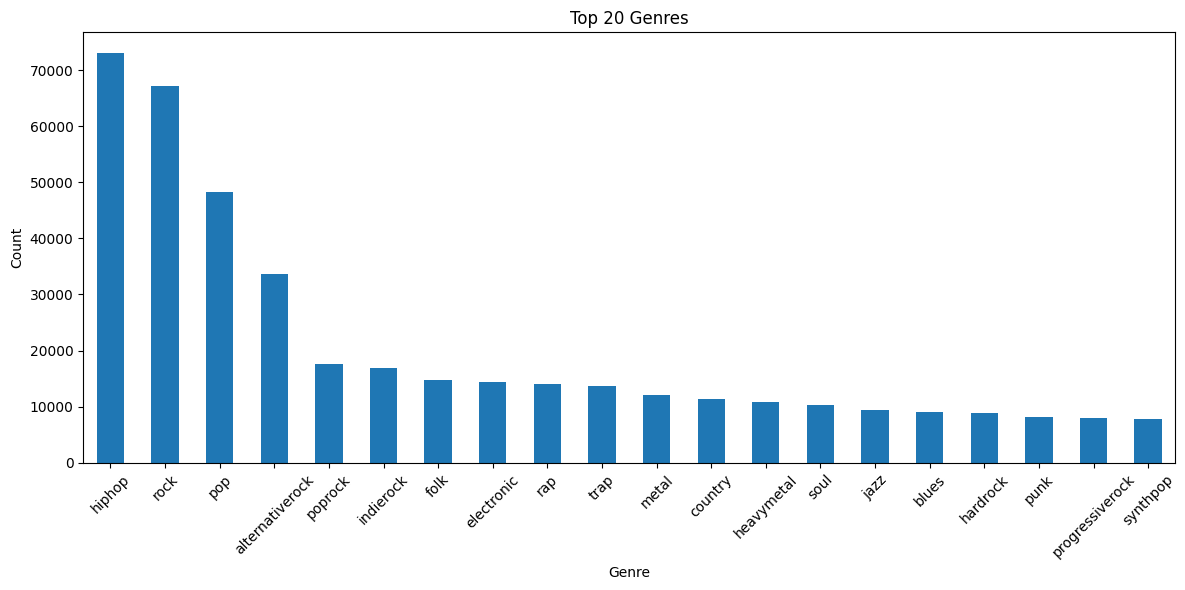

<Axes: ylabel='Genre'>

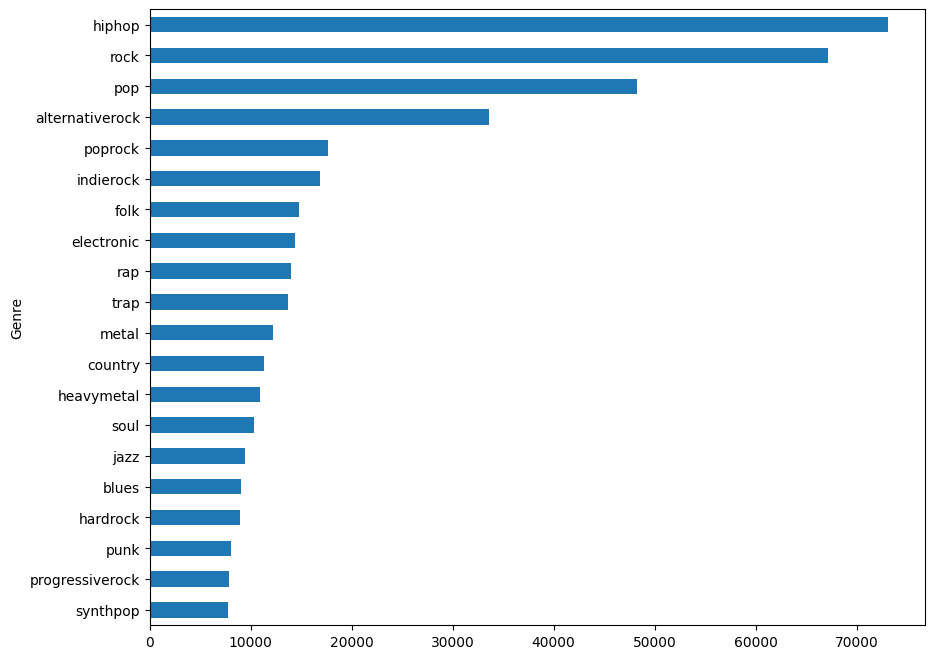

In [206]:
top_genres = data['Genre'].explode().value_counts().nlargest(20)
top_genres.plot(kind='bar', figsize=(12, 6))
plt.title('Top 20 Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_genres.sort_values().plot(kind='barh', figsize=(10, 8))

In [207]:
data.Genre_str

0         rock pop comedy
1         rock pop comedy
2         rock pop comedy
3         rock pop comedy
4         rock pop comedy
               ...       
244684             hiphop
244685             hiphop
244686             hiphop
244687             hiphop
244688             hiphop
Name: Genre_str, Length: 244689, dtype: object

In [208]:
data = data.drop('Genre', axis=1)

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244689 entries, 0 to 244688
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Artist(s)                 244689 non-null  object 
 1   song                      244689 non-null  object 
 2   text                      244689 non-null  object 
 3   emotion                   244689 non-null  object 
 4   Tempo                     244689 non-null  int64  
 5   Loudness (db)             244689 non-null  float64
 6   Energy                    244689 non-null  int64  
 7   Danceability              244689 non-null  int64  
 8   Positiveness              244689 non-null  int64  
 9   Speechiness               244689 non-null  int64  
 10  Liveness                  244689 non-null  int64  
 11  Acousticness              244689 non-null  int64  
 12  Instrumentalness          244689 non-null  int64  
 13  Good for Party            244689 non-null  i

In [214]:
data.to_csv("cleaned_data.csv", index = False)